In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

**Exercise 1**

In [9]:
data1 = pd.Series([1.1, 1.7, 1.7, 1.1, 1.1, 1.4, 1.1, 1.4, 1.0, 1.2, 1.1, 1.1, 1.1, 1.1, 1.1, 1.8, 1.6, 1.1, 1.2, 1.5,
1.3, 1.1, 1.3, 1.1, 1.1])

On essaye de créer les limites des classes avec [*range(…)] de Python...

In [39]:
bins2 = [*range(0.9, 2, 0.2)]
bins2

TypeError: 'float' object cannot be interpreted as an integer

...mais cela ne marche pas car cette dernière prend seulement des entiers.

Donc on utilise np.linspace.

In [11]:
bins3 = np.linspace(0.9, 1.9, num = 6)
bins3

array([0.9, 1.1, 1.3, 1.5, 1.7, 1.9])

1.a

In [12]:
pd.cut(data1, bins = bins3).value_counts().sort_index()

(0.9, 1.1]    14
(1.1, 1.3]     4
(1.3, 1.5]     3
(1.5, 1.7]     3
(1.7, 1.9]     1
dtype: int64

1.b

In [13]:
pd.cut(data1, bins = bins3).value_counts(normalize = True).sort_index()

(0.9, 1.1]    0.56
(1.1, 1.3]    0.16
(1.3, 1.5]    0.12
(1.5, 1.7]    0.12
(1.7, 1.9]    0.04
dtype: float64

1.c

In [14]:
pd.cut(data1, bins = bins3).value_counts().sort_index().cumsum()

(0.9, 1.1]    14
(1.1, 1.3]    18
(1.3, 1.5]    21
(1.5, 1.7]    24
(1.7, 1.9]    25
dtype: int64

Qu’est-ce qu’il se passe si on utilise une liste de Python à la place d’une série de Pandas pour construire les tableaux de fréquences ?

In [15]:
data2 = [1.1, 1.7, 1.7, 1.1, 1.1, 1.4, 1.1, 1.4, 1.0, 1.2, 1.1, 1.1, 1.1, 1.1, 1.1, 1.8, 1.6, 1.1, 1.2, 1.5,
1.3, 1.1, 1.3, 1.1, 1.1]

In [16]:
pd.cut(data2, bins = bins3).value_counts().sort_index()

(0.9, 1.1]    14
(1.1, 1.3]     4
(1.3, 1.5]     3
(1.5, 1.7]     3
(1.7, 1.9]     1
dtype: int64

In [18]:
pd.cut(data2, bins = bins3).value_counts(normalize = True).sort_index()

TypeError: value_counts() got an unexpected keyword argument 'normalize'

In [19]:
pd.cut(data2, bins = bins3).value_counts().sort_index().cumsum()

(0.9, 1.1]    14
(1.1, 1.3]    18
(1.3, 1.5]    21
(1.5, 1.7]    24
(1.7, 1.9]    25
dtype: int64

Avec une liste on peut obtenir les tableaux de fréquences absolues et de celles cumulées, mais pas celui des fréquences relatives. 

Donc il vaut mieux d’utiliser une série et pas une liste.

**Exercise 2**

In [20]:
data_qual = pd.Series(['O', 'A', 'B', 'O', 'O', 'O', 'O', 'O', 'AB', 'O', 'O', 'O', 'O', 'B', 'O', 'B', 'O', 'A', 'A', 'A', 'O', 'A', 'A', 'B', 'AB', 'A',
'B', 'A', 'A', 'A', 'A', 'O', 'A', 'O', 'O', 'A', 'A', 'O', 'O', 'A', 'O', 'O', 'O', 'O', 'A', 'A', 'A', 'A', 'A', 'AB'])

In [21]:
data_qual.value_counts().sort_index()

A     20
AB     3
B      5
O     22
dtype: int64

**Exercise 3**

In [22]:
bins4 = np.linspace(1, 2, num = 6)
bins4

array([1. , 1.2, 1.4, 1.6, 1.8, 2. ])

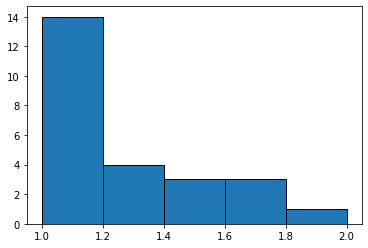

In [26]:
plt.hist(data2, bins = bins4, edgecolor ="black");

**Exercise 4**

On peut se demander pourquoi ne pas utiliser un simple histogramme, au lieu d’un diagramme à barres qui nécessite de calculer les fréquences des données. 

Voici l’histogramme.

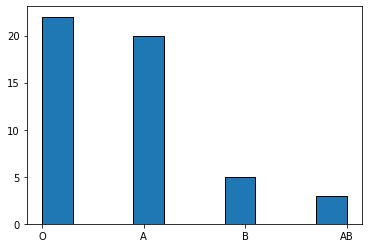

In [25]:
plt.hist(data_qual, edgecolor = "black");

Ce n’est pas trop mal. Il y a des espaces entre le colonnes et les étiquettes des classes ne sont pas centrées. Mais les colonnes sont déjà ordonnées de la plus à la moins fréquente.

En effet le fait que les colonnes soient ordonnées est dû au hasard, car dans la liste des données la valeur O apparaissait avant les autres, ensuite A, B et AB.

Si on change l’ordre des données, cela va changer aussi l’ordre des colonnes.	 

In [36]:
data_qual2 = pd.Series(['B', 'O', 'AB', 'A', 'B', 'O', 'O', 'O', 'O', 'O', 'AB', 'O', 'O', 'O', 'O', 'O', 'B', 'O', 'A', 'A', 'A', 'O', 'A', 'A', 'B', 'AB', 'A',
'B', 'A', 'A', 'A', 'A', 'O', 'A', 'O', 'O', 'A', 'A', 'O', 'O', 'A', 'O', 'O', 'O', 'O', 'A', 'A', 'A', 'A', 'A'])

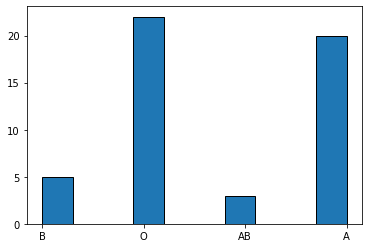

In [37]:
plt.hist(data_qual2, edgecolor = "black");

Donc on est obligés à utiliser la méthode plus laborieuse avec les diagrammes à barres.

In [27]:
import collections

diction = collections.Counter(data_qual)
diction

Counter({'O': 22, 'A': 20, 'B': 5, 'AB': 3})

In [28]:
noms = list(diction.keys())
noms

['O', 'A', 'B', 'AB']

In [29]:
freq = list(diction.values())
freq

[22, 20, 5, 3]

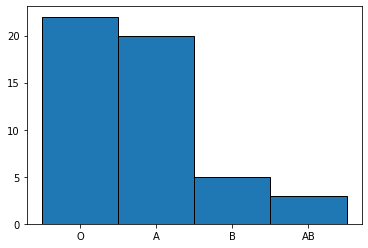

In [30]:
plt.bar(range(len(diction)), freq, tick_label = noms, width = 1.0, edgecolor = "black");

Comme le dictionnaire obtenu est déjà trié, on n’a pas besoin de le trier.

Mais si on prend la liste des données où on a changé l’ordre, alors on est obligé à trier le dictionnaire.

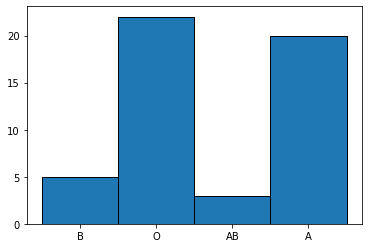

In [38]:
diction2 = collections.Counter(data_qual2)
noms2 = list(diction2.keys())
freq2 = list(diction2.values())

plt.bar(range(len(diction2)), freq2, tick_label = noms2, width = 1.0, edgecolor = "black");

In [40]:
dict_ord = dict(sorted(diction2.items(), key = lambda x:x[1], reverse = True))
dict_ord

{'O': 22, 'A': 20, 'B': 5, 'AB': 3}

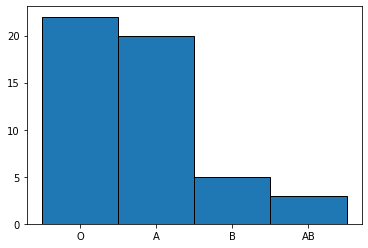

In [41]:
noms_tri = list(dict_ord.keys())
freq_tri = list(dict_ord.values())

plt.bar(range(len(dict_ord)), freq_tri, tick_label = noms_tri, width = 1.0, edgecolor = "black");